# Data Science and Big Data

## Project 1 - Telling a Story with Data

### Team 5 - Radhika Govindarajan(rgovind2), Yuchan Guo(yuchang)

# <font color = blue> Introduction

The Gender Pay Gap is a pervasive global issue that transcends borders, cultures, and socio-economic backgrounds, impacting individuals irrespective of their professional pursuits. Informed by the groundbreaking research of 2023 Economics Nobel Prize awardee Claudia Goldin (Refer article - https://www.scientificamerican.com/article/why-women-earn-less-than-men-economic-historian-wins-nobel-for-work-on-gender-pay-gap/), we endeavor to investigate the nuanced relationship between gender pay inequalities and economic growth, drawing on the rich dataset at our disposal.

# <font color = blue> Motivation & Related Work

As two aspiring scholars pursuing advanced degrees, we intimately understand the challenges and disparities that can arise in the workforce, which underscores the gravity of this matter. Our commitment to addressing complex, socially relevant challenges finds a profound resonance in delving into this dataset.

This analysis holds personal significance for us, as it aligns with our dedication to advancing a more inclusive and equitable workforce. The objective of this project is to not only illuminate the existing disparities but also to showcase our analytical prowess in deriving meaningful insights. Through a comprehensive examination of the data, we aim to generate insights that will serve as a foundation for policy recommendations and workplace strategies dedicated to reducing the gender pay gap.

Both of us are well acquainted with the global prevalence of gender disparities. Additionally, I once listened to the “Invisible Women” podcast, which eloquently addresses the gender imbalances in data and technology, which further fueled my desire to delve into gender related workforce issues. Recognizing the substantial impact of the wage gap, we were particularly drawn to this dataset for analysis. This project not only aligns with our existing knowledge and passion but we also believe that will help us derive meaningful insights and offer policy recommendations to address this issue.

We also recently came across this analysis done by the US Census Bureau - https://www.gao.gov/products/gao-23-106041 which emphasizes the variations in pay gaps among the different racial and ethnic groups and education levels, further underlining the complexity of the issue.

# <font color = blue> Dataset

We obtained this gender pay gap dataset from Kaggle - https://www.kaggle.com/datasets/fedesoriano/gender-pay-gap-dataset 

The dataset, sourced from the Kaggle platform, comprises Panel Study of Income Dynamics (PSID) microdata spanning three decades from 1980 to 2010. With 344,287 rows and 234 columns of raw data, a meticulous data cleaning process is imperative. We plan to focus our analysis on a select portion of the dataset to extract the most relevant and meaningful insights.

This dataset provides a comprehensive collection of socio-economic and demographic information for individuals, spanning various aspects of their lives.

- It encompasses identification variables such as interview numbers and gender, along with personal details like age, region
- Educational and employment-related data includes the highest level of schooling, employment status, degree status, occupation, and industry. Additionally, income and work experience metrics, such as hourly wage and years of experience are included.
- Various dummy variables represent racial and ethnic categories, and indicators for government employment and self-employment are provided.

Notably, the dataset encompasses a diverse range of information, making it suitable for a wide array of analyses and studies pertaining to individual socio-economic profiles.

# <font color = blue> Our Hypothesis - Possible Findings and Implications

To guide our analysis, we have formulated a set of hypotheses.

- We anticipate uncovering a significant gender pay gap in the labor market, with women earning substantially less than their male counterparts.
- Furthermore, we posit that factors such as years of experience and education level will play pivotal roles in determining earnings for both genders, with potential variations in their influence.
- Additionally, we expect to observe regional disparities in income, reflecting the complex interplay of socio-economic factors. - Industry sectors are anticipated to wield a substantial influence on wage disparities, possibly owing to historical biases or structural factors. We are particularly intrigued by the potential variations in the gender pay gap among different racial and ethnic groups, and aim to explore the temporal evolution of these disparities.

This hypothesis serves as a comprehensive framework for our project, encompassing the main questions and areas of investigation we outlined earlier and also sets the stage for analysis of datasets.

# <font color = blue> Key Questions

Below are our key questions based on our hypothesis:
    
1. Does a significant wage gap exist between men and women ?
  - Overall distribution of hourly wage
  - How does the average/median vary between men and women ?
  - Is the observed wage disparity specific to certain occupation or industries ?
  - Do industries have an equal or acceptable proportion of men and women ?
  - How does the level of wage disparity vary between industries ?
2. What are the underlying causes that contribute to this wage disparity ?
  - Work Experience
  - Education Level
  - Racial Disparities
  - Working Hours
3. How proportionate are the differences in these factors with the difference in wages and how has this evolved over the years ?

# <font color = blue> Cleaning the Data

In [1]:
# Importing the required libraries

import pandas as pd
import numpy as np
import altair as alt
from matplotlib import pyplot as plt
alt.data_transformers.enable('vegafusion')

DataTransformerRegistry.enable('vegafusion')

In [2]:
# Reading the CSV file as dataframe

income_dynamics = pd.read_csv("PanelStudyIncomeDynamics.csv")

In [3]:
# Printing the top 5 rows of the dataframe

income_dynamics.head()

,intnum68,pernum68,wave,sex,intnum,farminc,region,famwgt,relhead,age,...,foodcare,building,sales,officeadmin,farmer,constructextractinstall,production,transport,sumocc,LEHS
0,1152,24,1981,1,3505,0.0,1.0,17.000,10,34,...,0,0,1,0,0,0,0,0,1,0
1,5057,171,1981,1,675,0.0,2.0,2.000,10,32,...,0,0,0,0,0,0,1,0,1,1
2,6375,170,2009,1,8505,0.0,1.0,6.565,10,64,...,0,0,0,0,0,0,1,0,1,1
3,2261,3,1999,1,4202,0.0,2.0,25.973,10,50,...,0,0,0,0,0,0,0,1,1,1
4,5927,7,1990,1,605,0.0,3.0,14.819,10,26,...,0,0,0,0,0,0,1,0,1,1


In [4]:
# Getting the number of records

income_dynamics.shape

(33398, 274)

In [5]:
# Printing the variables of the dataframe

list(income_dynamics.columns)

['intnum68',
 'pernum68',
 'wave',
 'sex',
 'intnum',
 'farminc',
 'region',
 'famwgt',
 'relhead',
 'age',
 'employed',
 'sch',
 'annhrs',
 'annlabinc',
 'occ',
 'ind',
 'white',
 'black',
 'hisp',
 'othrace',
 'degree',
 'degupd',
 'schupd',
 'annwks',
 'unjob',
 'usualhrwk',
 'labincbus',
 'yrsexp',
 'yrsftexp',
 'yrsptexp',
 'yrsptexpsq',
 'yrsftexpsq',
 'yrsExpSq',
 'yrsexpfz',
 'yrsftexpfz',
 'yrsptexpfz',
 'yrsexpfzsq',
 'yrsftexpfzsq',
 'yrsptexpfzsq',
 'wtrgov',
 'selfemp',
 'predict98',
 'predictft98',
 'predict00',
 'predictft00',
 'predict02',
 'predictft02',
 'predict04',
 'predictft04',
 'predict06',
 'predictft06',
 'predict08',
 'predictft08',
 'predict10',
 'predictft10',
 'origage',
 'origannHrsHD',
 'origannHrsWF',
 'origannLabIncHD',
 'origannLabIncWF',
 'origannWeeksHD',
 'origannWeeksWF',
 'origcurrHrWkHD',
 'origcurrHrWkWF',
 'origdegreeHD',
 'origdegreeWF',
 'origemp',
 'origeverwrkHD07',
 'origeverwrkHD09',
 'origeverwrkHD11',
 'origeverwrkHD99',
 'origeverwrkW

Our dataset has 274 variables, however not all variables are relevant to our analysis, hence obtained a subset of the datset with only required columns as mentioned below.

In [6]:
# Obtaining subset of relevant variables

income_dynamics = income_dynamics[['wave', 'sch','sex', 'region', 'age', 'schupd', 'degupd',
                                   'employed', 'annhrs', 'annwks','usualhrwk', 'realhrwage',
                                   'yrsexp', 'yrsftexp', 'yrsptexp', 'wtrgov', 'selfemp', 'occ', 'ind','occ2name',
                                   'white', 'black', 'hisp', 'othrace',
                                   'northeast', 'northcentral', 'south', 'west',
                                   'Agriculture', 'miningconstruction', 'durables', 'nondurables', 'Transport', 'Utilities',
                                   'Communications', 'retailtrade', 'wholesaletrade', 'finance', 'SocArtOther',
                                   'hotelsrestaurants', 'Medical', 'Education', 'professional', 'publicadmin', 'sumind',
                                   'manager', 'business', 'financialop', 'computer', 'architect', 'scientist', 'socialworker',
                                   'postseceduc', 'legaleduc', 'artist', 'lawyerphysician', 'healthcare', 'healthsupport',
                                   'protective', 'foodcare', 'building', 'sales', 'officeadmin', 'farmer',
                                   'constructextractinstall', 'production', 'transport']]

In [7]:
# Data Dictionary of the variables in the dataset

income_dynamics_dict = {'wave': 'year',
                        'sex': 'gender',
                        'region': 'region of the individual',
                        'age': 'age of the individual',
                        'employed': 'whether they are employed or unemployed',
                        'schupd': 'schooling status',
                        'degreeupd': 'Indicates the highest level of degree obtained by the individual',
                        'annhrs': 'Annual working hours logged by the invidual',
                        'usualhrwk': 'Typical working hours logged by the individual per week',
                        'anwks': 'Annual working weeks logged by the individual',
                        'annualbinc': 'Annual Labor Income',
                        'realhrwage': 'Hourly Wage paid to the individual',
                        'occ': 'Occupation code',
                        'ind': 'Working Industry code',
                        'occ2name': 'Occupation Name',
                        'wrtgov': 'Binary variable indicating if the individual works in government',
                        'selfemp': 'Variable indicating if the individual is self-employed',
                        'white': 'Binary variable indicating if the individual is white or not',
                        'black': 'Binary variable indicating if the individual is black or not',
                        'hisp': 'Binary variable indicating if the individual is hispanic or not',
                        'othrace': 'Binary variable indicating if the individual belongs to other race or not'
                        }

In [8]:
# Checking for null values in the dataset

income_dynamics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33398 entries, 0 to 33397
Data columns (total 67 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   wave                     33398 non-null  int64  
 1   sch                      33373 non-null  float64
 2   sex                      33398 non-null  int64  
 3   region                   33395 non-null  float64
 4   age                      33398 non-null  int64  
 5   schupd                   33398 non-null  int64  
 6   degupd                   33358 non-null  float64
 7   employed                 33398 non-null  int64  
 8   annhrs                   33398 non-null  int64  
 9   annwks                   33398 non-null  float64
 10  usualhrwk                33303 non-null  float64
 11  realhrwage               33398 non-null  float64
 12  yrsexp                   33398 non-null  float64
 13  yrsftexp                 33398 non-null  float64
 14  yrsptexp              

In [9]:
# Dropping rows with null values
income_dynamics = income_dynamics.dropna()

In [10]:
# Printing the top 5 rows of the cleaned dataset

income_dynamics.head()

,wave,sch,sex,region,age,schupd,degupd,employed,annhrs,annwks,...,healthsupport,protective,foodcare,building,sales,officeadmin,farmer,constructextractinstall,production,transport
0,1981,16.0,1,1.0,34,17,1.0,1,1600,32.000000,...,0,0,0,0,1,0,0,0,0,0
1,1981,14.0,1,2.0,32,14,0.0,1,520,13.000000,...,0,0,0,0,0,0,0,0,1,0
2,2009,12.0,1,1.0,64,12,0.0,1,2550,51.000000,...,0,0,0,0,0,0,0,0,1,0
3,1999,12.0,1,2.0,50,12,0.0,1,3072,51.200001,...,0,0,0,0,0,0,0,0,0,1
4,1990,12.0,1,3.0,26,12,0.0,1,2100,50.000000,...,0,0,0,0,0,0,0,0,1,0


# <font color = blue> Getting to know the dataset

In [11]:
# Getting the number of rows and columns

income_dynamics.shape

(33121, 67)

In [12]:
# Replacing the encoded values with actual gender

income_dynamics['sex'] = income_dynamics['sex'].replace({1:'Male',2:'Female'})

In [13]:
# Obtaining the number of male and female respondents in the dataset

income_dynamics['sex'].value_counts()

sex
Female    17026
Male      16095
Name: count, dtype: int64

### Visualizing the number of male and female respondents in the dataset

In [14]:
# Visualizing the gender difference

chart = alt.Chart(income_dynamics).mark_bar().encode(
    x=alt.X('sex', title='Gender'),
    y=alt.Y('count()', title='Count'),
    color = 'sex'
).properties(width=300)

chart_dict = chart.to_dict(format="vega")

chart


alt.Chart(...)

The difference between men and women accounts to 931. This difference is insignificant, given the humongous size of the whole dataset.

# <font color = blue> 1. Does a significant wage gap exists between men and women ?

In [15]:
# Obtaining descriptive statistics about the hourly wage

income_dynamics['realhrwage'].describe()

count    33121.000000
mean        22.146541
std         20.565448
min          2.016176
25%         12.094047
50%         18.071297
75%         26.494669
max       1000.000000
Name: realhrwage, dtype: float64

### Visualizing the distribution of realhrwage

In [16]:
# Summary statistics
summary_stats = income_dynamics['realhrwage'].describe().reset_index()

# Histogram with limited x-axis range and no title
histogram = alt.Chart(income_dynamics).mark_bar().encode(
    alt.X('realhrwage',
          bin=alt.Bin(maxbins=100, extent=[0, 1000]),  # Set extent to limit the range
          title=None  # Remove the title
         ),
    alt.Y('count()', title='Frequency')
).properties(title='Distribution of realhrwage')

# Combine the histogram with summary statistics
combined_chart = alt.vconcat(histogram,
                            alt.Chart(summary_stats).mark_text(size=14).encode(
                                x=alt.X('index:N', axis=None),
                                y=alt.Y('realhrwage:Q',axis=None)
                            ).properties(height=50))

# Display the chart
combined_chart.configure_axis(grid=True).configure_view(strokeWidth=0)

alt.VConcatChart(...)

From the descriptive statistics and the histogram, it can be observed that,

- The wide range between the minimum and maximum wages, along with the high standard deviation, suggests that there is a substantial disparity in hourly wages in the dataset. There may be a presence of extreme values or outliers on the higher end of the wage distribution.
- The fact that the maximum wage is so much higher than the 75th percentile (Q3) indicates the potential presence of outliers or extremely high wages.
- The median wage (50th percentile) is noticeably lower than the mean, which could indicate a right-skewed distribution with some high values pulling the mean upwards.
- The majority data is located in under 50 and the extremely high outliers will influence the mean and trends in the future analysis.

#### Hence, it is important to remove outliers before proceeding with further analysis.

In [17]:
Q1 = income_dynamics['realhrwage'].quantile(0.25)
Q3 = income_dynamics['realhrwage'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter outliers
income_dynamics = income_dynamics[(income_dynamics['realhrwage'] >= lower_bound) & (income_dynamics['realhrwage'] <= upper_bound)]

In [18]:
# Distribution of hourly wage by sex

income_dynamics.groupby('sex')['realhrwage'].describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
Female,16497.0,17.182356,9.102599,2.016176,10.267138,15.371642,22.160900,48.094776
Male,14843.0,21.220199,9.672275,2.045915,13.890953,19.662359,27.194426,48.000000


In [19]:
# Group the data by 'sex' and calculate the mean of 'realhrwage'
grouped_data = income_dynamics.groupby('sex')['realhrwage'].mean().reset_index()

# Create the bar chart
chart = alt.Chart(grouped_data).mark_bar().encode(
    x=alt.X('sex:N', axis=alt.Axis(labelAngle=0, labels=False, title=None)),
    y='realhrwage:Q',
    color='sex:N',
    tooltip=['sex:N', 'realhrwage:Q']
).properties(title='Average Real Hourly Wage by Sex',width=300
)

# Display the plot
chart

alt.Chart(...)

In this plot, we visulize the mean of wage for male and female. The difference between female wage and male wage is obvious. It indicates that the analysis is based on the fact that female has less wage than male.
The average hourly wage of men is clearly higher than that of women by $3.

### Visualizing the hourly wage distribution for men and women

In [20]:
# Summary statistics
summary_stats = income_dynamics['realhrwage'].describe().reset_index()

# Histogram for both sexes
histogram = alt.Chart(income_dynamics).mark_bar().encode(
    alt.X('realhrwage', bin=alt.Bin(maxbins=30, extent=[0, 60]), title='Hourly Wage'),
    alt.Y('count()', title='Frequency'),
    color='sex:N'
).properties(title=alt.TitleParams(text='Distribution of realhrwage', align='center'), width=400)

# Overlay summary statistics
text = alt.Chart(summary_stats).mark_text(size=14).encode(
    x=alt.X('index:N', axis=None),
    y=alt.Y('realhrwage:Q', axis=None)
).properties(height=200)

# Combine histogram and summary statistics
combined_chart = alt.layer(histogram, text, data=income_dynamics).resolve_scale(y='independent')

# Display the chart
combined_chart.configure_axis(grid=True).configure_view(strokeWidth=0).configure_legend(orient='none', legendX=200, legendY=20)

alt.LayerChart(...)

In this plot, we can see the female wage distribution is more right skewed than male. The distribution is not same which means the bias might happen because of the gender. But we also need to exclude other reasons in the further analysis.


As it can be observed from the graph, the average hourly wage for female is lower than the average hourly wage for male.

#### As the next step, we wanted to analyze if this is pertinent to the nature of the job done by men and women.

# <font color = blue> Is the observed disparity specific to certain occupations/industry ?

### Visualizing the proportion of men and women working across industries

In [21]:
# Creating a subset of data with occupation specific variables.

occ_dynamics = income_dynamics[['sex','annhrs','realhrwage','Agriculture', 'miningconstruction', 'durables', 'nondurables', 'Transport', 'Utilities',
                                   'Communications', 'retailtrade', 'wholesaletrade', 'finance', 'SocArtOther',
                                   'hotelsrestaurants', 'Medical', 'Education', 'professional', 'publicadmin', 'sumind',
                                   'manager', 'business', 'financialop', 'computer', 'architect', 'scientist', 'socialworker',
                                   'postseceduc', 'legaleduc', 'artist', 'lawyerphysician', 'healthcare', 'healthsupport',
                                   'protective', 'foodcare', 'building', 'sales', 'officeadmin', 'farmer',
                                   'constructextractinstall', 'production', 'transport']]

In [22]:
# Define a function to get the occupation name
def get_field(row):
    fields = row[1:].index[row[1:] == 1]  # Exclude 'sex' column
    if len(fields) > 0:
        return fields[0]
    else:
        return 'None'

In [23]:
occ_dynamics = occ_dynamics.copy()

# Apply the function to create the 'Field' column
occ_dynamics['Field of Work'] = occ_dynamics.apply(get_field, axis=1)

In [24]:
income_dynamics = income_dynamics.copy()

income_dynamics['Field of Work'] = occ_dynamics['Field of Work']

In [25]:
# Group the data by 'Field' and 'sex' and calculate the count
grouped_data = occ_dynamics.groupby(['Field of Work', 'sex']).size().reset_index(name='count')

# Create the stacked bar plot
stacked_bar_plot = alt.Chart(grouped_data).mark_bar().encode(
    x=alt.X('Field of Work:N', title='Field of work',axis=alt.Axis(labelAngle=30)),
    y=alt.Y('count:Q', title='Count'),
    color='sex:N',
    order=alt.Order('sex:N'),  # This determines the order of the stacked bars
    tooltip=['sex', 'count']  # Add tooltip for more information
).properties(title=alt.TitleParams(text='Proportion of Males and Females by Field'), width=800)

# Display the plot
stacked_bar_plot

alt.Chart(...)

In this plot, we can find out the signification unbalanced gender distributions in different fields. 

In the sectors such as education, medicine, social arts, finance, hotel management there is a clear dominance of women workers compared to men. However, in the case of fields such as mining, construciton, agriculture, transport, and trade, there are rare female workers. In our common senses, some work need more strength so they will prefer males especially in a biased society.

It is important to understand this distribution, as the observed gender disparities in industries have potential implications for the gender wage gap. It raises questions about whether industry choice plays a role in influencing wage disparities.
For instance, industries where women are dominant may be associated with lower average wages due to various factors like historical gender norms, negotiation practices, or undervaluation of work traditionally associated with women.

### Visualizing the existence of wage gap across industries

In [26]:
# Group the data by 'sex' and 'working_hardness' and calculate the mean of 'realhrwage'
grouped_data = occ_dynamics.groupby(['sex', 'Field of Work'])['realhrwage'].mean().reset_index()

# Create the plot
chart = alt.Chart(grouped_data).mark_line(point=True).encode(
    x=alt.X('Field of Work:O', title='Field of Work', axis=alt.Axis(labelAngle=30)),
    y=alt.Y('realhrwage:Q', title='Average hourly wage', axis=alt.Axis(tickCount=6)),
    color=alt.Color('sex:N', legend=alt.Legend(title='Sex'))
).properties(
    title=alt.TitleParams(text='Trend of Hourly wage based on field of work', anchor='middle', offset=30),
    width=800,
    height=400
)

# Display the plot
chart.configure_axis().configure_view(strokeWidth=0).configure_axisX(titlePadding=10)

alt.Chart(...)

From the above visualizations, it is evident that irrespective of the industry, men get paid higher than women. This led us to question the basis of this wage disparity, the underlying causes.


The provided visualizations clearly depict a persistent gender-based wage gap in diverse industries, with men consistently earning higher wages than women. This wage disparity can be attributed to a complex interplay of factors, including occupational segregation, education and skill differentials, workplace discrimination, the "motherhood penalty," negotiation disparities, and societal gender biases.

#### Hence as we check for the presence of any possible underlying reasons for this wage gap, such as differences in educational level between men and women, years of experience, racial disparities.

# <font color = blue> Is there a correlation between work experience and the disparity in hourly wages between men and women?

In [27]:
# Creating a subset of data with wage, sex and years of experience

exp_dynamics = income_dynamics[['sex','yrsexp','realhrwage']]

In [28]:
# Creating categories of years of experience

# Defining conditions to get categories of work experience
conditions = [(exp_dynamics['yrsexp'] < 9),
              (exp_dynamics['yrsexp'] >= 9) & (exp_dynamics['yrsexp'] < 14),
              (exp_dynamics['yrsexp'] >= 14) & (exp_dynamics['yrsexp'] < 19),
              (exp_dynamics['yrsexp'] >= 19) & (exp_dynamics['yrsexp'] < 24),
              (exp_dynamics['yrsexp'] >= 24) & (exp_dynamics['yrsexp'] < 30),
              (exp_dynamics['yrsexp'] >= 30)
               ]

# Define the corresponding categories
categories = ["Entry_Level", "Senior_Level", "Mid_Senior_Level", "Director_Level", "Principal_Level", "Leadership"]

In [29]:
exp_dynamics = exp_dynamics.copy()

# Defining the work experience for each individual based on the defined categories
exp_dynamics['work_experience'] = pd.Categorical(np.select(conditions, categories), categories=categories)

In [30]:
income_dynamics = income_dynamics.copy()

income_dynamics['work_experience'] = exp_dynamics['work_experience']

### Visualizing the frequency of male and female under each category

In [31]:
# Group and count the data by 'sex' and 'work_experience'
grouped_data = exp_dynamics.groupby(['sex', 'work_experience']).size().reset_index(name='count')

# Create the grouped bar plot
grouped_bar_plot = alt.Chart(grouped_data).mark_bar().encode(
    x=alt.X('sex:N', title=None, axis=alt.Axis(labelAngle=0)),
    y=alt.Y('count:Q', title='Count'),  # Remove y-axis title and labels
    color='sex:N',
    column=alt.Column('work_experience:N', title=None)
).properties(
    title=alt.TitleParams(text='Number of Males and Females by Work Experience', anchor='middle', offset=30),
    width=100
)

# Display the plot
grouped_bar_plot.configure_axisX(labels=False).configure_axisY(labels=True).configure_view(strokeWidth=0)

alt.Chart(...)

It can be observed that in each category, the proportion of female is higher than the proportion of male. This might be due to the following reasons:

The higher representation of females might be a reflection increased access to education, training, and development opportunities, which empower women to pursue and excel in their chosen careers.

The higher proportion of females in each category is indicative of progress in achieving gender parity, driven by improved access to education, training, and changing societal norms that empower women to pursue diverse career paths. Additionally, policy interventions and the recognition of the economic and social benefits of gender diversity have contributed to this shift, highlighting the value of inclusive workplaces where both men and women have equal opportunities for professional success.

### Visualizing the wage difference between male and female under each category

In [32]:
# Group the data by 'sex' and 'working_hardness' and calculate the mean of 'realhrwage'
grouped_data = exp_dynamics.groupby(['sex', 'work_experience'])['realhrwage'].mean().reset_index()

# Create the plot
chart = alt.Chart(grouped_data).mark_line(point=True).encode(
    x=alt.X('work_experience:O', title='Experience Level', sort=categories, axis=alt.Axis(labelAngle=0)),
    y=alt.Y('realhrwage:Q', title='Average hourly wage', axis=alt.Axis(tickCount=6)),
    color=alt.Color('sex:N', legend=alt.Legend(title='Sex'))
).properties(
    title=alt.TitleParams(text='Trend of Hourly wage based on experience level', anchor='middle', offset=30),
    width=600,
    height=250
)

# Display the plot
chart.configure_axis().configure_view(strokeWidth=0).configure_axisX(titlePadding=10)

alt.Chart(...)

From the above graph, it is clearly evident that men consistently earn higher wages than women across all levels of work experience indicating the presence of gender-based wage gap.


The graph clearly illustrates that a gender-based wage gap exists, with men consistently earning higher wages than women across all levels of work experience. This disparity is influenced by factors such as occupational segregation, negotiation differences, gender bias, and work-life balance challenges, underscoring the need for targeted efforts to address and rectify this long-standing issue in the workforce. Typically, female will earn about $3 less for each level than male.

Explain more.....

#### Thereby, as the next step, it is important to investigate similarly if other factors such as education, racial disparities, working hours, play a role in this disparity.

# <font color = blue> Does education account for the wage disparity ?

In [33]:
# Creating a subset of data with wage, sex and years of experience

edu_dynamics = income_dynamics[['sex','degupd','realhrwage']]

In [34]:
# Replacing the encoded values with actual education level
edu_dynamics = edu_dynamics.copy()

# Define conditions and corresponding categories
education_conditions = [
    (edu_dynamics['degupd'] == 0),
    (edu_dynamics['degupd'] == 1),
    (edu_dynamics['degupd'] == 2)
]

education_categories = [
    'High School',
    "Bachelor's Degree",
    "Master's Degree"
]

# Create a new column 'education_level' based on conditions and categories
edu_dynamics['education_level'] = pd.Categorical(np.select(education_conditions, education_categories, default='Other'), categories=education_categories)

In [35]:
income_dynamics = income_dynamics.copy()

income_dynamics['education_level'] = edu_dynamics['education_level']

### Proportion of male and female with respect to each education level

In [36]:
# Group the data by 'education_level' and 'sex' and calculate the count
grouped_data = edu_dynamics.groupby(['education_level', 'sex']).size().reset_index(name='count')

# Create the grouped bar plot
grouped_bar_plot = alt.Chart(grouped_data).mark_bar().encode(
    x=alt.X('sex:N', title=None),
    y=alt.Y('count:Q', title='Count'),
    color='sex:N',
    column=alt.Column('education_level:N', title='Education Level')
).properties(title=alt.TitleParams(text='Number of Males and Females by Education Level',anchor='middle', offset=30), width=150)

# Display the plot
grouped_bar_plot.configure_axisX(labels=False).configure_axisY(labels=True).configure_view(strokeWidth=0)

alt.Chart(...)

A significant majority of individuals have attained a high school education as their highest level of academic achievement. Furthermore, across all three education categories (High School, Bachelor's Degree, and Master's Degree), the distribution of males and females is relatively balanced, with females slightly outnumbering males in certain instances.

These findings provide valuable insights about the gender representation under each educational profile, showing that it is equal.

### Visualizing the difference in wage between men and women with similar education levels

In [37]:
# Group the data by 'sex' and 'working_hardness' and calculate the mean of 'realhrwage'
grouped_data = edu_dynamics.groupby(['sex', 'education_level'])['realhrwage'].mean().reset_index()

# Create the plot
chart = alt.Chart(grouped_data).mark_line(point=True).encode(
    x=alt.X('education_level:O', title='Education Level', sort=categories, axis=alt.Axis(labelAngle=0)),
    y=alt.Y('realhrwage:Q', title='Average hourly wage', axis=alt.Axis(tickCount=6)),
    color=alt.Color('sex:N', legend=alt.Legend(title='Sex'))
).properties(
    title=alt.TitleParams(text='Trend of Hourly wage based on education level', anchor='middle', offset=30),
    width=600,
    height=250
)

# Display the plot
chart.configure_axis().configure_view(strokeWidth=0).configure_axisX(titlePadding=10)

alt.Chart(...)

The observation suggests that regardless of the education level attained, men consistently earn higher hourly wages compared to women in your dataset.

- This implies that factors beyond education play a significant role in determining wages. While education is a critical factor in wage disparity determination, it is not the sole contributor. It is possible that men and women with similar education levels may be working in different industries or occupations that offer varying wage scales.

#### Hence as the next step we analyzed if this wage gap is specific to some industries.

# <font color = blue > Does racial disparities contribute to differences in wage ?

In [38]:
# Creating a subset of data to include racial features

race_dynamics = income_dynamics[["sex", "annhrs", "realhrwage", "region", "white", "black", "hisp", "othrace", "northeast", "northcentral", "south", "west"]]

### Visualizing the wage differences between men and women of different race

In [39]:
# Reshape the data for Altair
data = pd.melt(race_dynamics, id_vars=['sex', 'realhrwage'], value_vars=['white', 'black', 'hisp', 'othrace'],
               var_name='race', value_name='race_status')

# Create a grouped bar chart
chart = alt.Chart(data).mark_bar().encode(
    x=alt.X('sex:N', title=None,axis=alt.Axis(labelAngle=0, labels=False)),
    y=alt.Y('mean(realhrwage):Q', title='Mean realhrwage'),
    color=alt.Color('sex:N', title='Sex'),
    column=alt.Column('race:N', title=None)
).properties(
    width=150,  # Adjust the width of each subplot as needed
    height=200,  # Adjust the height of each subplot as needed
    title=alt.TitleParams(text='Mean realhrwage by Race and Sex', anchor='middle', offset=30),
)

chart

alt.Chart(...)

In this plot, we first analyzed different races inner difference. It is obvious that whatever the races are, male earn more wage than female.

The enduring wage disparities between males and females, regardless of race, persist as a consequence of multifaceted systemic and societal factors. Occupational segregation, gender-based discrimination, deeply ingrained stereotypes and expectations, differential negotiation patterns, work-life balance challenges, systemic inequities, and the underrepresentation of women and women of color in leadership roles collectively contribute to these disparities.

# <font color = blue> Does it mean there is a difference in the amount of time spent working between men and women?

In [40]:
# Creating a subset of data with wage, sex and years of experience

time_dynamics = income_dynamics[['wave', 'sex','annhrs','realhrwage']]

In [41]:
# Distribution of annual working hours

time_dynamics.groupby('sex')['annhrs'].describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
Female,16497.0,1810.550646,597.071353,10.0,1560.0,1930.0,2079.0,5100.0
Male,14843.0,2190.361180,580.692865,10.0,1952.0,2097.0,2464.0,5840.0


It can be observed that average working hours of male is higher than the average working hours of female.

### Visualizing the pattern of working hours of men and women

In [42]:
# Create a histogram plot
chart = alt.Chart(time_dynamics).mark_bar().encode(
    x=alt.X('annhrs:Q', bin=alt.Bin(maxbins=20), title='Annual Working Hours'),
    y=alt.Y('count()', title='Frequency'),
    color=alt.Color('sex:N', legend=None)
).properties(
    width=300,  # Adjust the width of each subplot as needed
    height=200,  # Adjust the height of each subplot as needed
)

# Facet the plot by 'sex'
facet_chart = chart.facet(column=alt.Column('sex:N', header=alt.Header(titlePadding=30,title= None)))

# Concatenate the facets and set a common title
combined_chart = alt.concat(facet_chart, title=alt.TitleParams(text='Distribution of Annual Working Hours by Sex', anchor='middle'))

# Show the plot
combined_chart

alt.ConcatChart(...)

As we can see from the plot, male has more frequency working more than 2000 hours but female has more frequency working less than 2000 or about 2000. It might because female need to spend more time on family weekly and when we focus on annually, the difference become significant. More working time means more exprience and better performance in work. It might also be a possible reason for wage gap.

### Visualizing difference in working hours by occupation

In [43]:
# Group the data by 'education_level' and 'sex' and calculate the count
grouped_data = income_dynamics.groupby(['sex','Field of Work'])['annhrs'].median().reset_index()

# Create the grouped bar plot
grouped_bar_plot = alt.Chart(grouped_data).mark_bar().encode(
    x=alt.X('sex:N', title=None),
    y=alt.Y('annhrs:Q', title='Average annual working hours'),
    color='sex:N',
    column=alt.Column('Field of Work:N', title='Field of Work')
).properties(title=alt.TitleParams(text='Differences in working hours by occupation',anchor='middle', offset=30), width=100)

# Display the plot
grouped_bar_plot.configure_axisX(labels=False).configure_axisY(labels=True).configure_view(strokeWidth=0)

alt.Chart(...)


Women often encounter challenges in spending equal time as men in high-demand occupations that require long and inflexible working hours, such as certain positions in the agriculture, education, and hotel. These roles often demand intense commitment and extensive work hours, which can be particularly challenging for women, especially if they have caregiving responsibilities. In contrast, women are more likely to have equal working hours with men in professions and industries that have embraced more flexible work arrangements. The ability to balance work and personal life is often influenced by workplace culture, policies, and societal norms, impacting the extent to which women can achieve work-hour parity with their male counterparts.

In [44]:
# Define the conditions and corresponding categories
conditions = [(time_dynamics['annhrs'] == 0),
    (time_dynamics['annhrs'] > 0) & (time_dynamics['annhrs'] < 1500),
    (time_dynamics['annhrs'] >= 1500) & (time_dynamics['annhrs'] < 1800),
    (time_dynamics['annhrs'] >= 1800) & (time_dynamics['annhrs'] < 2050),
    (time_dynamics['annhrs'] >= 2050) & (time_dynamics['annhrs'] < 2150),
    (time_dynamics['annhrs'] >= 2150) & (time_dynamics['annhrs'] <= 2500),
    (time_dynamics['annhrs'] > 2500)
             ]

# Define the corresponding categories
categories = ["no_work",
              "little work",
              "slightly little work",
              "average work",
              "slightly hard work",
              "hard work",
              "workaholic"
              ]

In [45]:
# Create the new column 'working_hardness' based on the conditions
time_dynamics = time_dynamics.copy()  # Create a copy to avoid modifying the original DataFrame

time_dynamics['working_level'] = pd.Categorical(np.select(conditions, categories), categories=categories)

In [46]:
income_dynamics = income_dynamics.copy()

income_dynamics['working_level'] = time_dynamics['working_level']

### Visualizing the wage differences between men and women with similar working hours

In [47]:
# Group the data by 'sex' and 'working_hardness' and calculate the mean of 'realhrwage'
grouped_data_wage = time_dynamics.groupby(['sex', 'working_level'])['realhrwage'].mean().reset_index()

# Create the plot
chart = alt.Chart(grouped_data_wage).mark_line(point=True).encode(
    x=alt.X('working_level:O', title='Working Hardness', sort=categories),
    y=alt.Y('realhrwage:Q', title='Average realhrwage'),
    color=alt.Color('sex:N', legend=alt.Legend(title='Sex'))
).properties(width=600)

# Set x-axis labels to the working hardness categories
chart = chart.configure_axis(labelAngle=45)

# Add a title
chart = chart.properties(title='Trend of realhrwage by Working Hardness')

chart_dict = chart.to_dict(format="vega")

# Show the plot
chart

alt.Chart(...)

Even between people with similar working patterns, the wage disparity significant difference. Since we seperate the different work time into groups, the difference should ignore if the reason that female has less wage is because of working time. However, it is obvious that no matter what the work time is, female will get less wage than man.

# <font color = blue > Does the wage difference accurately correspond to the difference in working hours ? How has this evolved over the years ?

### Visualizing and comparing difference in average working hours and average wage diff. >> Pie chart using matplotlib to show the differences over the years.

In [48]:
# Assuming you have a DataFrame named time_dynamics
# with columns: wave, realhrwage, annhrs, sex

# Create a pivot table to calculate the average working hours and hourly wage
pivot_table = time_dynamics.pivot_table(index='wave', columns='sex', 
                                       values=['realhrwage', 'annhrs'], 
                                       aggfunc='mean')

# Initialize a list to hold the charts
charts = []

# Iterate through the years
for year in pivot_table.index:
    year_data = pivot_table.loc[year]

    # Create a DataFrame for plotting
    df = pd.DataFrame({
        'Category': ['Male', 'Female'],
        'Average Hourly Wage': [year_data['realhrwage']['Male'], year_data['realhrwage']['Female']],
        'Average Working Hours': [year_data['annhrs']['Male'], year_data['annhrs']['Female']]
    })

    # Create pie chart for hourly wage
    wage_chart = alt.Chart(df).mark_arc().encode(
        alt.Color('Category:N', scale=alt.Scale(range=['blue','orange'])),
        alt.Tooltip('Category:N'),
        alt.Size(value=60),  # Adjust the radius value here
        theta='Average Hourly Wage:Q',
    ).properties(title=f'Year {year} - Average Hourly Wage')

    # Create pie chart for working hours
    hours_chart = alt.Chart(df).mark_arc().encode(
        alt.Color('Category:N', scale=alt.Scale(range=['blue','orange'])),
        alt.Tooltip('Category:N'),
        alt.Size(value=60),  # Adjust the radius value here
        theta='Average Working Hours:Q',
    ).properties(title=f'Year {year} - Average Working Hours')

    # Combine both charts for each year
    combined_chart = alt.hconcat(wage_chart, hours_chart)

    # Add the combined chart to the list
    charts.append(combined_chart)

# Concatenate all charts into a single visualization
alt.vconcat(*charts)  # Adjust width and height as needed

alt.VConcatChart(...)

The above visualization clearly depicts the following:
    
Working Hours: 
- There is a relatively small difference in working hours between men and women in each year. Men consistently worked a slightly higher percentage of the total annual hours compared to women.
- For instance, in 1981, men worked around 56.1% of the total hours, while women worked approximately 43.9%. By 2011, men were working about 53.9% of the total hours, and women were working around 46.1%.

Wage Gap:
- The wage gap fluctuated over the years, but there is a discernible trend. In 1981, men earned approximately 59.8% of the total wage, while women earned about 40.2%. By 2011, this gap had narrowed slightly, with men earning around 53.8% and women earning about 46.2%. This suggests a gradual improvement in gender wage equality, but a significant gap still remains.

Wage Gap vs. Working Hours Difference:
- The wage gap and the difference in working hours are related but distinct aspects of the gender earnings disparity. The wage gap primarily reflects differences in the hourly earnings between men and women, while the working hours difference indicates variations in the amount of time spent working.

- The wage gap tends to be more significant in magnitude compared to the difference in working hours. This means that even when men and women work similar hours, there is still a notable disparity in their earnings.

Overall, Over the observed period (1981 to 2011), there is evidence of a gradual improvement in gender wage equality. The wage gap has reduced, albeit modestly. In 1981, men earned around 59.8% of the total wage, whereas in 2011, they earned about 53.8%. This suggests that efforts to address gender wage disparities have had some impact, although there is still work to be done.

The difference in working hours between men and women has remained relatively stable over the years. Men consistently worked a slightly higher percentage of the total hours, indicating a persistent but relatively small difference in time spent at work.

### Recreating the plot with labels

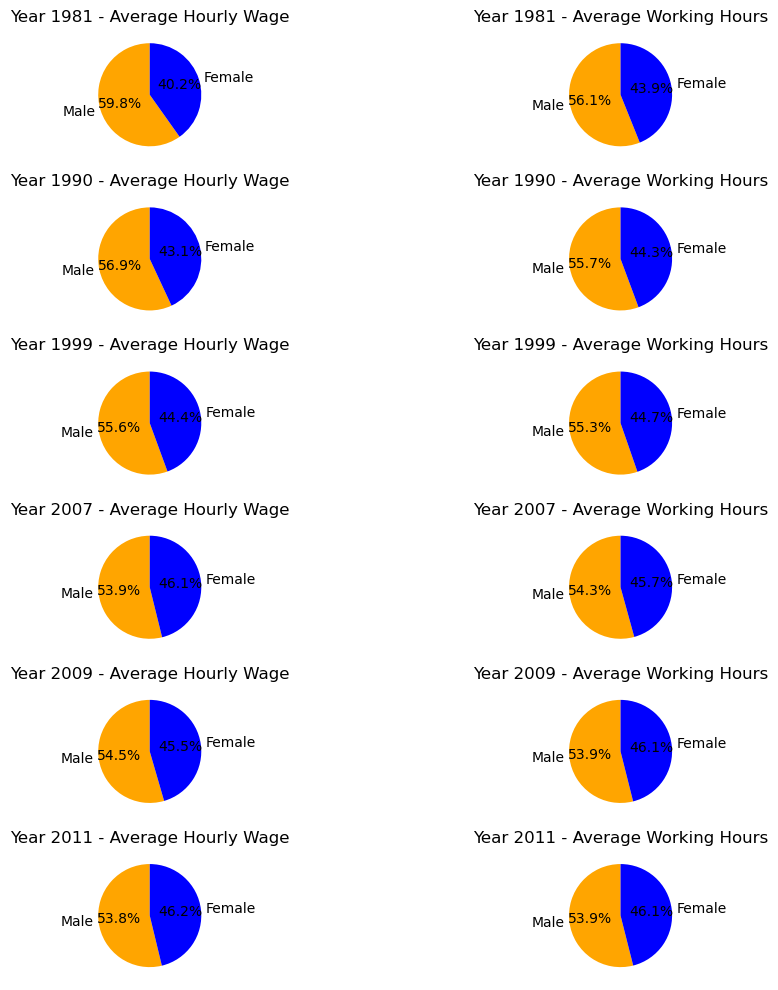

In [49]:
# Create a pivot table to calculate the average working hours and hourly wage
pivot_table = income_dynamics.pivot_table(index='wave', columns='sex', 
                                          values=['realhrwage', 'annhrs'], 
                                          aggfunc='mean')

# Set up subplots
num_years = len(pivot_table.index)
fig, axes = plt.subplots(nrows=num_years, ncols=2, figsize=(12, 10))

# Iterate through the years
for i, year in enumerate(pivot_table.index):
    year_data = pivot_table.loc[year]
    
    # Create labels and values for the pie charts
    labels = ['Male', 'Female']
    avg_hourly_wage = year_data['realhrwage']
    avg_working_hours = year_data['annhrs']
    sizes_wage = [avg_hourly_wage['Male'], avg_hourly_wage['Female']]
    sizes_hours = [avg_working_hours['Male'], avg_working_hours['Female']]
    
    # Create pie chart for hourly wage
    axes[i, 0].pie(sizes_wage, labels=labels, autopct='%1.1f%%', startangle=90, 
                   colors=['orange','blue'])
    axes[i, 0].set_title(f'Year {year} - Average Hourly Wage')
    
    # Create pie chart for working hours
    axes[i, 1].pie(sizes_hours, labels=labels, autopct='%1.1f%%', startangle=90, 
                   colors=['orange','blue'])
    axes[i, 1].set_title(f'Year {year} - Average Working Hours')

# Adjust layout and add spacing between subplots
plt.tight_layout()

# Save plot as image
plt.savefig('average_income_plot.png')

# Show plot
plt.show()

# <font color = blue> Key Findings:

Below are our key findings from the analysis:

#### - A significant wage gap exists between men and women:

The analysis unequivocally establishes the existence of a substantial wage gap between men and women. This wage disparity is evident across various dimensions, including industries, occupations, education levels, and levels of work experience. The consistent pattern of men earning higher wages than women underscores the persistence of this issue.

The distribution of hourly wages reveals a wide range, indicating considerable disparity in earnings. The presence of potential outliers on the higher end of the wage distribution suggests the influence of extremely high wages in certain cases. This could be attributed to factors such as executive salaries or specialized professions.

On average, men consistently earn higher wages than women across all levels of work experience, education levels, and industries. This recurring pattern is a clear indication of a gender-based wage gap. The difference in average wages suggests systemic disparities in pay between genders.

#### - Some industries clearly reflect dominance of women while others reflect underrepresentation:

The analysis identifies distinct disparities in gender representation across different industries. Some industries exhibit a clear dominance of either male or female workers. This industry-specific imbalance can contribute to the wage gap.

Industries such as education, medicine, social arts, finance, and hotel management are predominantly populated by women. This suggests a higher representation of women in these fields compared to men.

Conversely, industries like mining, construction, agriculture, transport, and trade have a notably lower presence of female workers. These industries are characterized by a scarcity of women workers.

Industries where women constitute the majority of the workforce may be associated with lower average wages for several reasons. One factor contributing to this association is the influence of historical gender norms and societal expectations. These norms have traditionally undervalued and marginalized work that is predominantly performed by women. As a result, industries where women are more prevalent may be subject to systemic undervaluation of their contributions, leading to lower overall wages.

#### - Differences in work experience, education level or racial disparities do not fully account for the wage gap:

The wage gap is a complex issue influenced by a multitude of factors. These include occupational segregation, wherein men and women tend to be concentrated in different roles or industries. 

Our analysis evidently shows that, while work experience, education level, and racial disparities are important factors affecting earnings, they do not fully account for the wage gap. 

Even when controlling for these variables, men consistently earn higher wages than women. 
       
#### - Differences in time spent in work between men and women is a major factor contributing to the wage gap
       
Through the whole analysis, while men and women have similar trends with respect to education, years of experience etc., one area of distinction was that men do work slightly more hours than women.

Though the difference is relatively small in average, this does seem to have a definitive implication on the wages received.

Moreover, the wage gap is disproportionate with the gap in working hours.
       
Also , the analysis indicates a modest improvement in gender wage equality over the observed period (1981 to 2011). The reduction in the wage gap suggests positive steps towards addressing gender disparities in earnings through education and representation of more women in industries. However, there is still work to be done to achieve true gender wage equality, and further efforts are needed to continue this positive trend.    

# <font color = blue> Call for Action/Recommendations:

Based on the specific findings , here are three actionable policy recommendations to address the gender wage gap:

#### 1. Promote Gender-Neutral Recruitment and Advancement Practices:

Implement policies that ensure unbiased recruitment, hiring, and promotion processes. This includes conducting blind resume screenings, offering unconscious bias training for hiring managers, and establishing clear and transparent criteria for evaluation.

#### 2. Encourage Industry-Specific Wage Equity Initiatives:

Develop industry-specific initiatives to address wage disparities. This can include conducting regular pay equity audits, establishing clear wage guidelines, and providing incentives for companies to actively work towards closing the wage gap within their respective industries.

To be specific for example, In male-dominated industries, establish industry-wide benchmarks for salaries based on educational attainment and years of experience. This ensures that individuals with comparable qualifications and experience receive equitable compensation.

#### 3. Support Flexible Work Arrangements and Work-Life Balance:

Women, on average, still bear a significant portion of caregiving responsibilities for children, elderly family members, or other dependents. Flexible work arrangements allow them to manage these responsibilities more effectively without compromising their careers.

Advocate for policies that promote flexible work arrangements, such as telecommuting and flexible hours. Encourage the adoption of family-friendly policies, such as paid parental leave and affordable childcare options, to support both men and women in balancing work and family responsibilities.

Women who have access to flexible work arrangements are more likely to pursue professional development opportunities and seek career advancement. This helps in narrowing the gender wage gap and increasing the representation of women in leadership roles.

These recommendations are tailored to address the specific challenges and disparities identified in our analysis. They focus on promoting fairness, transparency, and support for both men and women in the workforce, and can contribute to meaningful progress in achieving gender wage equality.

# <font color = blue> Final Comments on the analysis and Future Work:

- In conclusion, our analysis sheds light on the persistent gender wage gap and its multifaceted determinants. It underscores the importance of targeted interventions to address disparities in industries, promote flexible work arrangements, and implement gender-neutral recruitment practices. These steps are vital in achieving greater gender wage equality.

- Conducting in-depth studies on the impact of specific industry policies, examining the effectiveness of flexible work arrangements on reducing wage disparities, and assessing the long-term outcomes of gender-neutral recruitment practices are areas of potential focus. Additionally, delving into the influence of cultural and societal factors on the wage gap could provide valuable insights. Continued efforts and collaboration are essential to effect lasting change and create workplaces that prioritize fairness, inclusivity, and equal opportunity for all.

# <font color = blue> Limitations

While our dataset provides valuable insights into the gender wage gap, it's important to acknowledge its inherent limitations:

- Firstly, the dataset offers limited demographic information beyond gender, omitting factors like race, ethnicity, age, and socio-economic background that can influence wage disparities. 

- Additionally, contextual details about specific job roles, industry-specific factors, and company-level data are absent, potentially limiting our ability to account for all relevant variables. The dataset covers a specific time period, and economic conditions or policies may have evolved over time, potentially impacting the generalizability of our findings. It's also worth considering the potential for sampling bias, as certain industries or demographics may be overrepresented or underrepresented. 

- Moreover, the classification of occupations within the dataset may not align perfectly with standard industry classifications, introducing some level of ambiguity. We also recognize the presence of outliers or extreme values that could influence summary statistics and visualizations. Lastly, the dataset may not capture dynamic factors such as changes in policies or societal norms over time. 

- Despite these limitations, our analysis serves as a meaningful starting point for understanding the complexities of the gender wage gap, and offers directions for future research and policy interventions.

# <font color = blue> References:

1. https://altair-viz.github.io/getting_started/starting.html
2. https://altair-viz.github.io/gallery/pie_chart.html
3. https://stackoverflow.com/questions/77377162/how-to-calculate-averages-when-constantly-average-is-sum-of-one-col-divide-by-ot